In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf,
from tensorflow.keras import layers

In [27]:
IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=50

In [7]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", 
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 2140 files belonging to 3 classes.


In [8]:
classnames=dataset.class_names

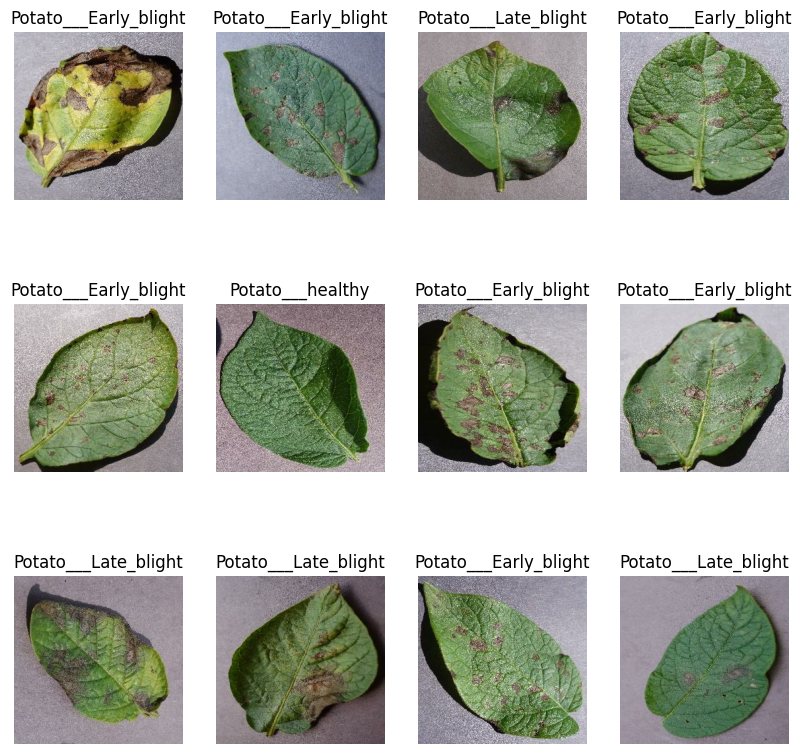

In [26]:
for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10,10))
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy()/255)
        plt.title(classnames[label_batch[i]])
        plt.axis('off')

In [35]:
def get_dataset_partition(ds, train_split=0.8, val_split=0.1 , test_split=0.1, shufffle=True):
    ds_size=len(ds)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [36]:
train_ds, test_ds, val_ds = get_dataset_partition(dataset)

In [37]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [76]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.Resizing(256,256),
    tf.keras.layers.Rescaling(1.0/255)
])

In [79]:
data_aug=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)

In [77]:
input_shape=(256,256)

In [84]:
model=tf.keras.models.Sequential([
    resize_and_rescale,
    data_aug,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(40, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [85]:
model.build(input_shape=input_shape)

In [86]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)           │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_14 (Sequential)           │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (32, 60, 60, 40)            │          23,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (32, 30, 30, 40)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (32, 28, 28, 64)            │          23,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 12544)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (32, 64)                    │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 868,651 (3.31 MB)

 Trainable params: 868,651 (3.31 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

In [89]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
    )

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 45s 858ms/step - accuracy: 0.9285 - loss: 0.2159 - val_accuracy: 0.9127 - val_loss: 0.2385
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 45s 847ms/step - accuracy: 0.9265 - loss: 0.1751 - val_accuracy: 0.8056 - val_loss: 0.4724
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 48s 906ms/step - accuracy: 0.9249 - loss: 0.2366 - val_accuracy: 0.9167 - val_loss: 0.1950
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 866ms/step - accuracy: 0.9521 - loss: 0.1408 - val_accuracy: 0.8651 - val_loss: 0.3444
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 84s 903ms/step - accuracy: 0.9422 - loss: 0.1491 - val_accuracy: 0.8849 - val_loss: 0.2349
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 52s 989ms/step - accuracy: 0.9622 - loss: 0.1012 - val_accuracy: 0.8492 - val_loss: 0.4725
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 835ms/step - accuracy: 0.9583 - loss: 0.1208 - val_accuracy: 0.9286 - val_loss: 0.2084
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 830ms/step - accuracy: 0.9635 - loss: 0.0932 - val_accu

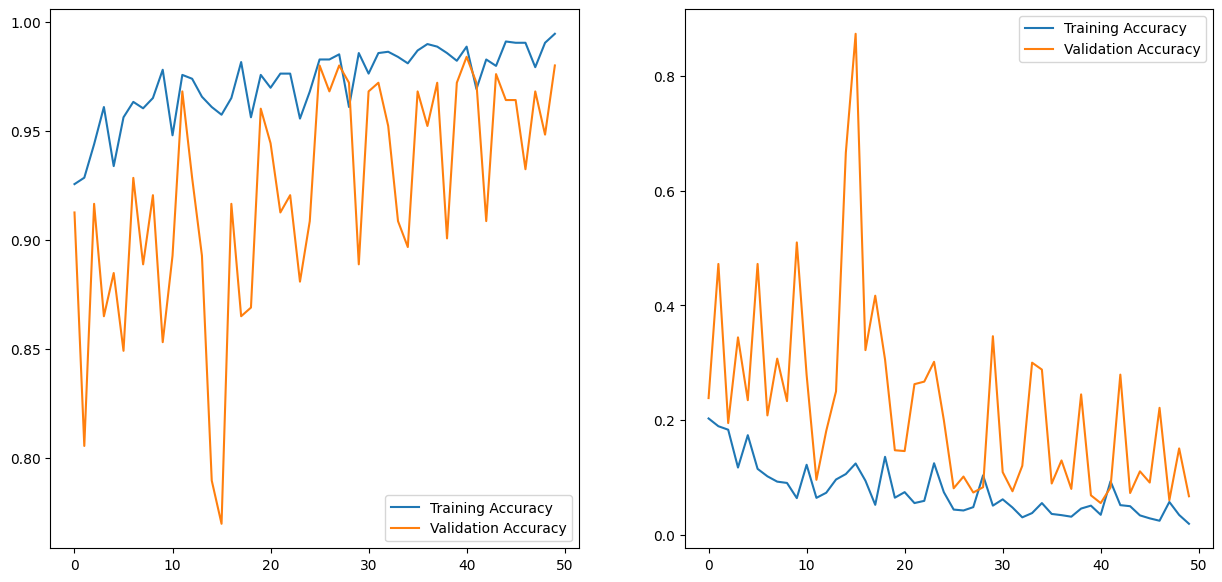

In [109]:
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend(loc='lower right')
plt.subplot(122)
plt.plot(history.history['loss'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label="Validation Accuracy")
plt.legend(loc='upper right')

In [96]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [110]:
model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.9950 - loss: 0.0158


[0.013551664538681507, 0.9947916865348816]

In [119]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) # Create a Batch

    predictions = model.predict(img_array)
    predicted_class= classnames[np.argmax(predictions[0])]

    confidence= round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


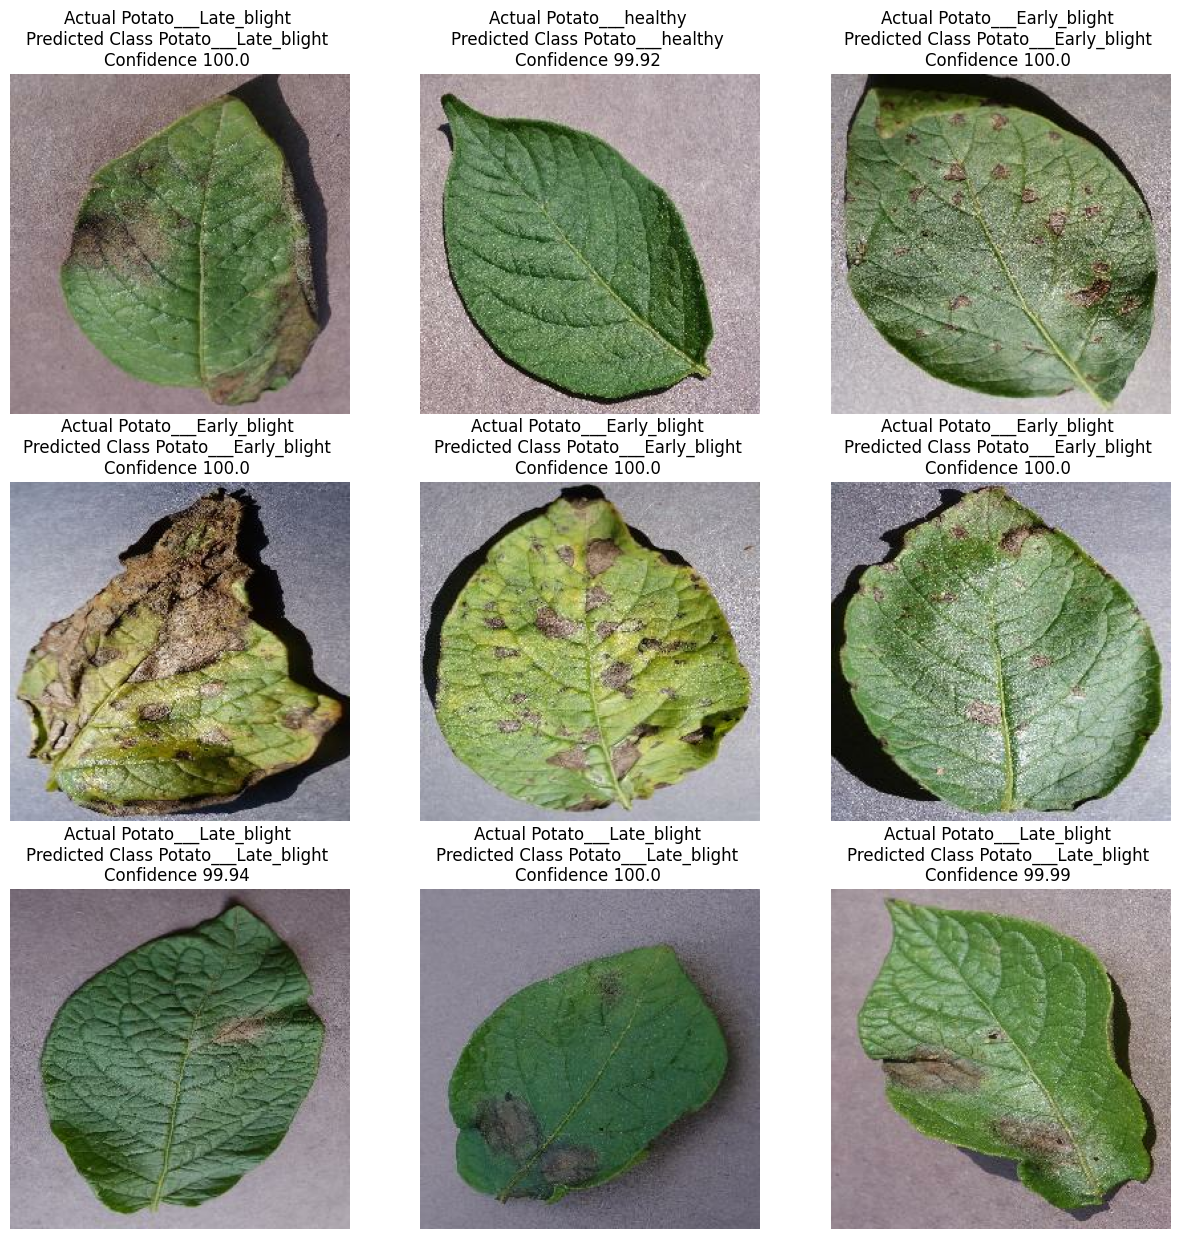

In [124]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy()/255)

        predicted_class, confidence=predict(model, images[i].numpy())
        actual_class= classnames[labels[i]]

        plt.title(f"Actual {actual_class} \nPredicted Class {predicted_class} \nConfidence {confidence} ")
        plt.axis('off')

In [129]:
model.export("../models/1")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


Saved artifact at '../models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_80')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2004975134736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2004975133968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2004975554000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2004975554192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2004975554960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2004975555536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2004975554768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2004975556304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2004975555728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2004975557072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2004975556496: TensorSpec(shape=(), 